In [2]:
# Required Libraries
import numpy as np
import pandas as pd
import textwrap

#from google.colab import data_table
from tabulate import tabulate
from prettytable import PrettyTable
from pybibx.base import pbx_probe

c:\Users\borbr\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load .bib
# Arguments: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
file_name = 'wos.bib'
database  = 'wos'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 297 Documents were Found ( 297 Documents and 0 Duplicates )

Article = 256
Article in Press = 15
Article; Book Chapter = 2
Proceedings Paper = 22
Review = 2


In [4]:
# Health Analysis
health = bibfile.health_bib()

# Check Health
health

,Entries,Completeness (%),Number of Docs
0,Sources,94.28%,280
1,Abstracts,98.99%,294
2,Affiliation,99.66%,296
3,Author(s),100.00%,297
4,DOI,93.60%,278
5,Keywords - Authors,78.45%,233
6,Keywords - Plus,88.55%,263
7,References,0.00%,0
8,Year,100.00%,297


In [5]:
# Generate EDA (Exploratory Data Analysis) Report
report  = bibfile.eda_bib()

# Check Report
report

,Main Information,Results
0,Timespan,1991-2025
1,Total Number of Countries,50
2,Total Number of Institutions,302
3,Total Number of Sources,110
4,Total Number of References,0
5,Total Number of Languages,5
6,--dutch (# of docs),1
7,--english (# of docs),290
8,--german (# of docs),2
9,--portuguese (# of docs),1


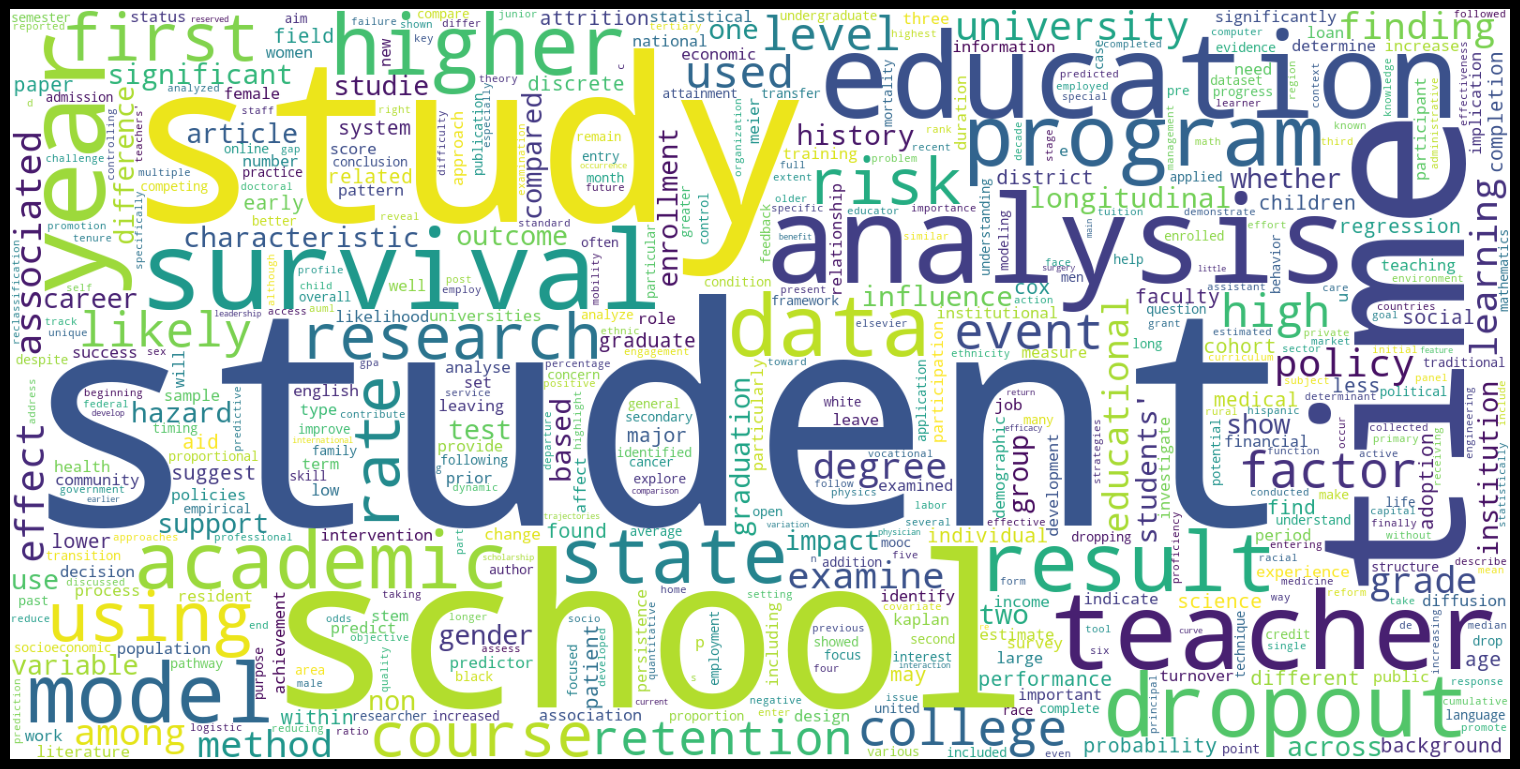

In [6]:
# WordCloud from the Abstracts, Title, Authors Keywords or Keywords Plus
# Arguments: entry             = 'abs', 'title', 'kwa', or 'kwp'
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500, rmv_custom_words = [])

In [7]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            txt_font_size     = Font size of the text inside the bins;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = [],
                            rmv_custom_words = [],
                            key              = 'kwa',
                            topn             = 10,
                            txt_font_size    = 12,
                            start            = 2010,
                            end              = 2021)

In [10]:
# Plot Count Y per X (An interactive bar chart)
# Arguments:
#   view          : Determines where the plot will be rendered. 'browser'  -> Plots in your preferred browser window. 'notebook' -> (if supported) Plots within your notebook environment.
#   rmv_unknowns  : Boolean flag to handle unknown entries. True  -> Removes any relationships containing unknown values.
#   x             : The key (column) to use for the X-axis. Must be one of: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'. Default is 'cout'.
#   y             : The key (column) to use for the Y-axis. Must be one of: 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan'. Default is 'aut'.
#   topn_x        : Maximum number of top X categories (based on total counts) to display. Default is 5.
#   topn_y        : Maximum number of top Y entries (per X category) to display. Default is 5.
#   text_font_size: Font size for the text labels displayed inside the bars. Default is 12.
#   x_angle       : Angle (in degrees) for the X-axis tick labels. Default is -90 (rotating labels vertically).
bibfile.plot_count_y_per_x(view = 'notebook', rmv_unknowns = True, x = 'cout', y = 'aut', topn_x = 5, topn_y = 5, text_font_size = 12, x_angle = -90)

In [11]:
# Countries Productivity Plot (An interactive plot). It informs the production for each Country (count is made considering each doc author)
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
bibfile.countries_productivity(view = 'notebook')

In [12]:
# Plot Top References
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn       = Specifies the number of top references (by citation count) to display in the plot;
#            font_size  = Controls the font size of the legend in the plot;
#            use_ref_id = Chooses between using reference names or reference IDs when processing and plotting data;
#            date_start = If provided, shows citing articles with a publication year greater than or equal to this value are included. If None, then there is no lower limit on the publication year.
#            date_end   = If provided, shows citing articles with a publication year less than or equal to this value are included. If None, then there is no upprer limit on the publication year.
bibfile.plot_top_refs(view = 'notebook', topn = 10, font_size = 10, use_ref_id = False, date_start = None, date_end = None)

In [13]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

c:\Users\borbr\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:151: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

